In [30]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn import svm
import matplotlib.pyplot as plt

Data Loading

In [31]:
train_set = np.load('../data/ml_data/HG002_2_3_00_400k_train.npz')
val_set = np.load('../data/ml_data/HG002_2_3_00_400k_val.npz')
test_set = np.load('../data/ml_data/HG002_2_3_00_400k_test.npz')
print(train_set.files)

['features', 'labels', 'read_ids']


In [32]:
X_train_3d = train_set['features']
y_train = train_set['labels']
X_val_3d = val_set['features']

print(X_train_3d.shape)
print(y_train.shape)
print(X_val_3d.shape)

# A, C, G, T, base quality, m6a score (dorado estimate)
# 7 on each side

X_train = X_train_3d.reshape(256000, 90)
X_val = X_val_3d.reshape(64000, 90)
print(X_train.shape)

(256000, 6, 15)
(256000,)
(64000, 6, 15)
(256000, 90)


XGBoost Example

In [33]:
# create model instance
bst = XGBClassifier(n_estimators=32, max_depth=4, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
train_preds = bst.predict(X_train)

accuracy = accuracy_score(y_train, train_preds)
loss = log_loss(y_train, train_preds)

print("train accuracy: " + str(accuracy))
print("train log loss: " + str(loss))

train accuracy: 0.71279296875
train log loss: 10.351990685292334


In [34]:
y_val = val_set['labels']
y_preds = bst.predict(X_val)

accuracy = accuracy_score(y_val, y_preds)
loss = log_loss(y_val, y_preds)
precision = precision_score(y_val, y_preds)
recall = recall_score(y_val, y_preds)
f1 = f1_score(y_val, y_preds)

print("accuracy: " + str(accuracy))
print("log loss: " + str(loss))
print("precision: " + str(precision))
print("recall: " + str(recall))
print("f1 score: " + str(f1))

accuracy: 0.6980625
log loss: 10.88293059517656
precision: 0.7069888961463096
recall: 0.6765
f1 score: 0.6914084956882786


XGBoost Evaluation

In [35]:
# Create new model
model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, objective='binary:logistic')

# Train the model and monitor loss on the validation set after each boosting iteration
evals = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=evals, eval_metric=["logloss", "error", "aucpr"], verbose=True)

# Retrieve the evaluation results
results = model.evals_result()

/net/gs/vol1/home/smkuhl/miniconda3/envs/ont_m6a/lib/python3.8/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67583	validation_0-error:0.31159	validation_0-aucpr:0.71968	validation_1-logloss:0.67819	validation_1-error:0.33187	validation_1-aucpr:0.70546
[1]	validation_0-logloss:0.66152	validation_0-error:0.31066	validation_0-aucpr:0.73022	validation_1-logloss:0.66591	validation_1-error:0.33030	validation_1-aucpr:0.71522
[2]	validation_0-logloss:0.64969	validation_0-error:0.31024	validation_0-aucpr:0.73807	validation_1-logloss:0.65589	validation_1-error:0.33373	validation_1-aucpr:0.72656
[3]	validation_0-logloss:0.63971	validation_0-error:0.31012	validation_0-aucpr:0.74254	validation_1-logloss:0.64755	validation_1-error:0.33356	validation_1-aucpr:0.73129
[4]	validation_0-logloss:0.63151	validation_0-error:0.30954	validation_0-aucpr:0.74394	validation_1-logloss:0.64089	validation_1-error:0.33300	validation_1-aucpr:0.73261
[5]	validation_0-logloss:0.62456	validation_0-error:0.30932	validation_0-aucpr:0.74633	validation_1-logloss:0.63523	validation_1-error:0.33270	validat

In [36]:
print(results.keys())
print(results['validation_1'].keys())

dict_keys(['validation_0', 'validation_1'])
odict_keys(['logloss', 'error', 'aucpr'])


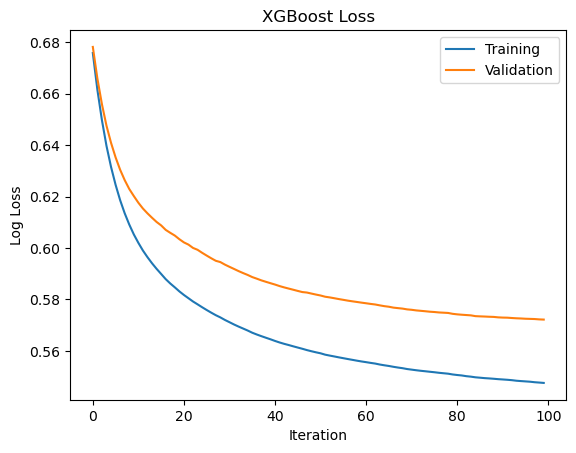

In [37]:
plt.plot(range(len(results["validation_0"]["logloss"])), results["validation_0"]["logloss"], label="Training")
plt.plot(range(len(results["validation_1"]["logloss"])), results["validation_1"]["logloss"], label="Validation")
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('XGBoost Loss')
plt.legend()
plt.savefig('Loss_Chart.png')

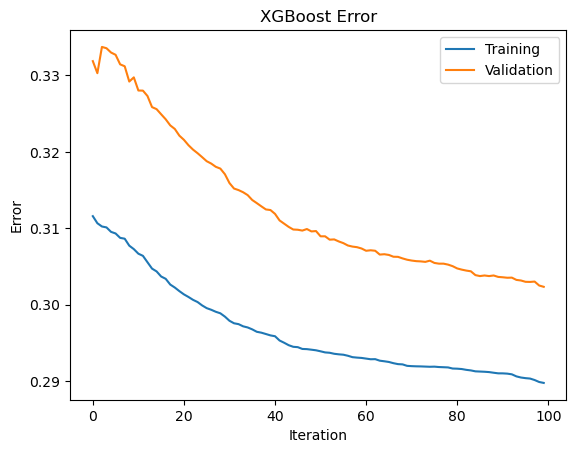

In [38]:
plt.plot(range(len(results["validation_0"]["error"])), results["validation_0"]["error"], label="Training")
plt.plot(range(len(results["validation_1"]["error"])), results["validation_1"]["error"], label="Validation")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.legend()
plt.savefig('Accuracy_Chart.png')

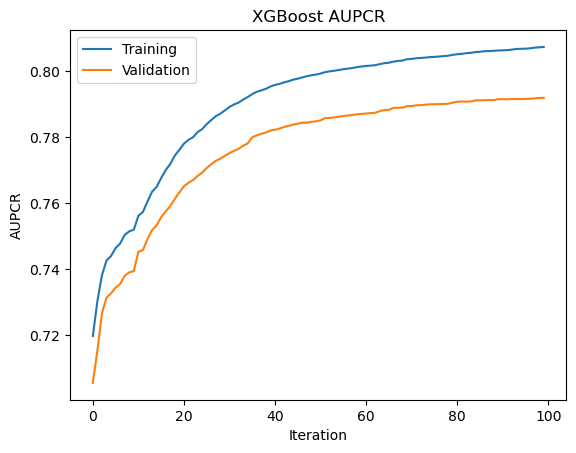

In [39]:
plt.plot(range(len(results["validation_0"]["aucpr"])), results["validation_0"]["aucpr"], label="Training")
plt.plot(range(len(results["validation_1"]["aucpr"])), results["validation_1"]["aucpr"], label="Validation")
plt.xlabel('Iteration')
plt.ylabel('AUPCR')
plt.title('XGBoost AUPCR')
plt.legend()
plt.savefig('Accuracy_Chart.png')

Support Vector Machine

In [40]:
'''
Runs for a really long time so eliminated as an option

clf = svm.SVC()
clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
accuracy = accuracy(y_train, train_preds)
loss = loss(y_train, train_preds)

print(accuracy)
print(loss)
'''

'\nRuns for a really long time so eliminated as an option\n\nclf = svm.SVC()\nclf.fit(X_train, y_train)\n\ntrain_preds = clf.predict(X_train)\naccuracy = accuracy(y_train, train_preds)\nloss = loss(y_train, train_preds)\n\nprint(accuracy)\nprint(loss)\n'